### Ejemplo de dataframe para gráfica de multilineas

In [1]:
import pandas as pd
import numpy as np

# Generar datos
fechas = pd.date_range(start="2000-01-01", end="2025-12-31", freq="YE")
n = len(fechas)

# Generar valores aleatorios que suben con el tiempo y caen bruscamente al final
valores = {
    "Fecha": fechas,
    "Columna1": np.concatenate([
        np.sort(np.random.uniform(100, 4000, n - 5)),  # Valores ascendentes aleatorios
        np.random.uniform(500, 1000, 5)  # Caída brusca al final
    ]),
    "Columna2": np.concatenate([
        np.sort(np.random.uniform(200, 3500, n - 5)),
        np.random.uniform(300, 800, 5)
    ]),
    "Columna3": np.concatenate([
        np.sort(np.random.uniform(300, 3000, n - 5)),
        np.random.uniform(100, 600, 5)
    ]),
    "Columna4": np.concatenate([
        np.sort(np.random.uniform(400, 2500, n - 5)),
        np.random.uniform(50, 500, 5)
    ]),
}

# Crear DataFrame
df = pd.DataFrame(valores)

# Transformar el DataFrame a formato long
df_long = pd.melt(
    df,
    id_vars=["Fecha"],
    value_vars=["Columna1", "Columna2", "Columna3", "Columna4"],
    var_name="Variable",
    value_name="Valor"
)

df_long

,Fecha,Variable,Valor
0,2000-12-31,Columna1,173.745840
1,2001-12-31,Columna1,380.424473
2,2002-12-31,Columna1,516.491275
3,2003-12-31,Columna1,529.900935
4,2004-12-31,Columna1,781.842149
...,...,...,...
99,2021-12-31,Columna4,406.707644
100,2022-12-31,Columna4,489.408874
101,2023-12-31,Columna4,209.028933
102,2024-12-31,Columna4,176.937860


### **Código a copiar para gráfica de multilineas:**

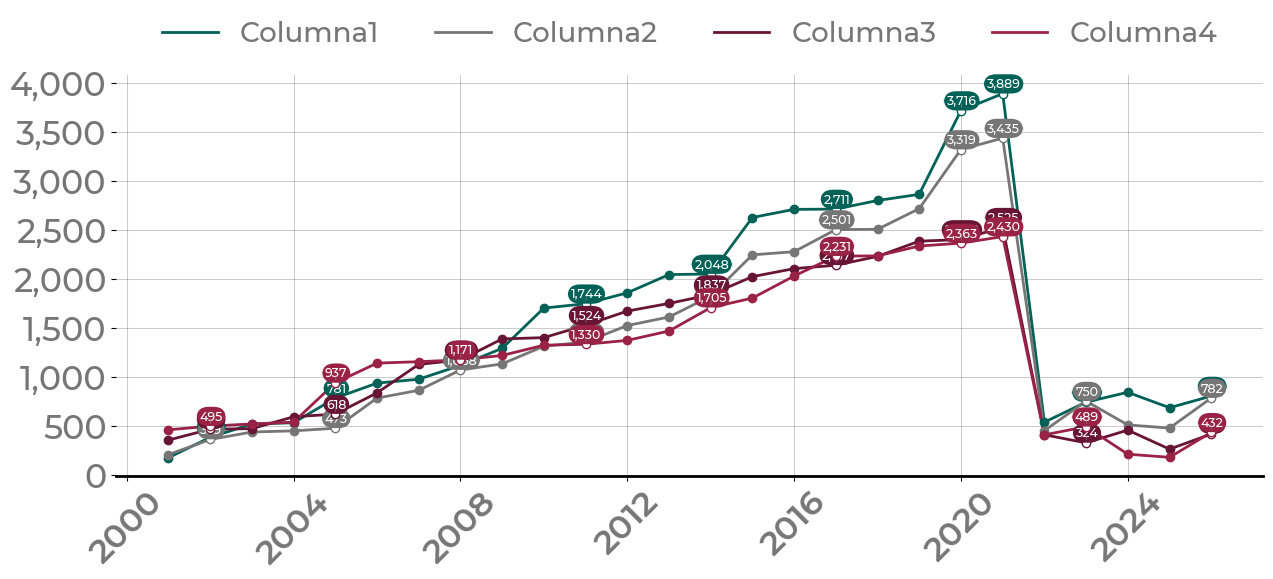

In [3]:
from pathlib import Path
from adjustText import adjust_text
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.font_manager as font_manager

def ajusta_etiquetas(dataframe, 
                     columnas, 
                     colores, 
                     columna_x, 
                     sin_tag=2, 
                     max=True, 
                     bbox_props=None, 
                     fontsize=12, 
                     fontname=None,
                     fontweight=None,
                     fontcolor=None
                     ):
    """
    Ajusta las etiquetas de los puntos en una gráfica utilizando adjustText y configura los marcadores.

    Args:
        dataframe (pd.DataFrame): DataFrame que contiene los datos a graficar.
        columnas (list): Lista de columnas del DataFrame que se desean etiquetar.
        colores (list): Lista de colores para las etiquetas, uno por cada columna.
        columna_x (str): Nombre de la columna que se usará como eje X.
        sin_tag (int, optional): Cantidad de puntos consecutivos sin etiqueta entre puntos etiquetados. Por defecto es 10.
        max (bool, optional): Si es True, añade etiquetas en los puntos máximos de cada columna. Por defecto es True.
        bbox_props (dict, optional): Propiedades del fondo de las etiquetas. Si es None, se usa un fondo predeterminado.
        fontsize (int, optional): Tamaño de la fuente de las etiquetas. Por defecto es 12.
    """
    texts = []
    for col, color in zip(columnas, colores):
        total_puntos = len(dataframe)
        max_index = dataframe[col].idxmax() if max else None  # Índice del valor máximo si max=True
        for i, row in dataframe.iterrows():
            # Determinar si el punto debe tener etiqueta
            tiene_etiqueta = (total_puntos - i - 1) % (sin_tag + 1) == 0 or i == total_puntos - 1 or (max and i == max_index)
            
            # Configurar el marcador
            plt.scatter(
                row[columna_x], 
                row[col], 
                color="white" if tiene_etiqueta else color,  # Relleno blanco si tiene etiqueta
                edgecolor=color,  # Borde del color correspondiente
                zorder=3
            )
            
            if tiene_etiqueta:
                # Crear propiedades de la cápsula con esquinas más redondeadas
                bbox_props = dict(boxstyle="round,pad=0.25,rounding_size=0.99", fc=color, ec="none", alpha=1.0)
                # Agregar texto con el color blanco y la cápsula
                texts.append(plt.text(
                    row[columna_x], 
                    row[col], 
                    f"{int(row[col]):,}",  # Redondear a enteros
                    fontsize=fontsize, 
                    color=fontcolor if fontcolor else "white",
                    weight=fontweight,
                    ha='center', 
                    va='bottom', 
                    bbox=bbox_props,
                    fontname=fontname
                ))
    
    # Ajustar las etiquetas con adjustText
    adjust_text(
        texts,
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
        force_text=(0.5, 0.5),
        expand_points=(10, 10),
        expand_text=(1.2, 1.2),
        only_move={'points': 'y', 'text': 'xy'},
        autoalign='y'
    )


def multilineal(
    df_long, 
    nombre=None,
    font = 'Arial',
    columna_fecha="Fecha", 
    columna_variable="Variable", 
    columna_valor="Valor", 
    tipografia=None
):
    
    font_config = {
        'family': font,
        'variable_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'variable_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'capsula_valor': {'size': 9, 'weight': 'medium', 'color': '#ffffff'},
        'leyenda': {'size': 20, 'weight': 'medium', 'color': '#767676'}
    }

    plt.rcParams['svg.fonttype'] = 'none'
    font_dirs = [Path("../0_fonts")]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)

    ancho_px = 1480
    alto_px = 520
    dpi = 100
    ancho_in = ancho_px / dpi
    alto_in = alto_px / dpi

    fig, ax = plt.subplots(figsize=(ancho_in, alto_in), dpi=dpi)

    colores_asignados = ["#006157", "#767676", "#671435", "#9B2247", "#9D792A", "#D5B162"]
    variables = df_long[columna_variable].unique()
    color_map = {var: colores_asignados[i % len(colores_asignados)] for i, var in enumerate(variables)}

    # Graficar cada variable y preparar para etiquetas
    for i, var in enumerate(variables):
        datos = df_long[df_long[columna_variable] == var]
        ax.plot(
            datos[columna_fecha],
            datos[columna_valor],
            label=var,
            color=color_map[var],
            linewidth=2
        )
        # Llamar a ajusta_etiquetas para cada línea
        ajusta_etiquetas(
            dataframe=datos.reset_index(drop=True),
            columnas=[columna_valor],
            colores=[color_map[var]],
            columna_x=columna_fecha,
            fontsize=font_config['capsula_valor']['size'],
            fontname=font_config['family'] ,
            fontweight=font_config['capsula_valor']['weight'],
            fontcolor=font_config['capsula_valor']['color']
        )

    # Etiquetas y formato
    plt.xticks(
        rotation=45,
        fontsize=font_config['variable_x']['size'],
        weight=font_config['variable_x']['weight'],
        color=font_config['variable_x']['color'],
        fontname=font_config['family']  
    )
    plt.yticks(
        fontsize=font_config['variable_y']['size'],
        weight=font_config['variable_y']['weight'],
        color=font_config['variable_y']['color'],
        fontname=font_config['family'] 
    )
    leg = ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.2),
        ncol=len(variables),
        frameon=False,
        prop={
            'size': font_config['leyenda']['size'],
            'weight': font_config['leyenda']['weight'],
            'family': font_config['family']
        }
    )
    # Aplicar color manualmente a los textos de la leyenda
    for text in leg.get_texts():
        text.set_color(font_config['leyenda']['color'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_linewidth(2)
    ax.grid(axis='y', linestyle='-', color='#000000', alpha=0.2, linewidth=0.75)
    ax.grid(axis='x', linestyle='-', color='#000000', alpha=0.2, linewidth=0.75)
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

    nombre_df = nombre or "multilineal"
    plt.savefig(f"{nombre_df}.svg", format='svg', bbox_inches='tight', dpi=dpi)
    plt.savefig(f"{nombre_df}.png", format='png', bbox_inches='tight', dpi=dpi)
    plt.show()

multilineal(df_long, font='Montserrat', nombre='multilineal', columna_fecha="Fecha")